김싸피는 차량 대기 시간이 긴 꼬리를 가지는 분포, 특히 Cauchy 분포를 따른다고 가정하고 이를 시뮬레이션하는 과업을 맡고 있습니다.도시 교통량을 분석할 때, 차량 대기 시간은 일정하지 않으며, 일부 차량이 극단적으로 긴 대기 시간을 가질 가능성이 존재합니다. 예를 들어, 교통 정체로 인해 몇 분 내에 통과하는 차량이 있는 반면, 일부 차량은 예상보다 훨씬 오래 대기할 수 있습니다.이러한 데이터는 Cauchy 분포와 같은 긴 꼬리 분포를 따를 가능성이 높으며, 평균과 분산이 정의되지 않는 특징을 가집니다. 우리는 이를 Cauchy 분포를 활용해 시뮬레이션하고, 표본 크기를 증가시키면서 평균이 수렴하지 않는 현상을 실험적으로 확인해봅시다.

1. Cauchy 분포를 따르는 교통 데이터 불러오기- 교통 정체로 인해 차량 대기 시간이 극단적으로 길어질 수 있음

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/data.csv')

# "cauchy_samples" 열만 추출해 Series로 만듦
cauchy_samples = df['cauchy_samples']

2. Cauchy 분포 데이터의 시각화- seaborn을 활용하여 긴꼬리 분포의 형태를 시각적으로 확인

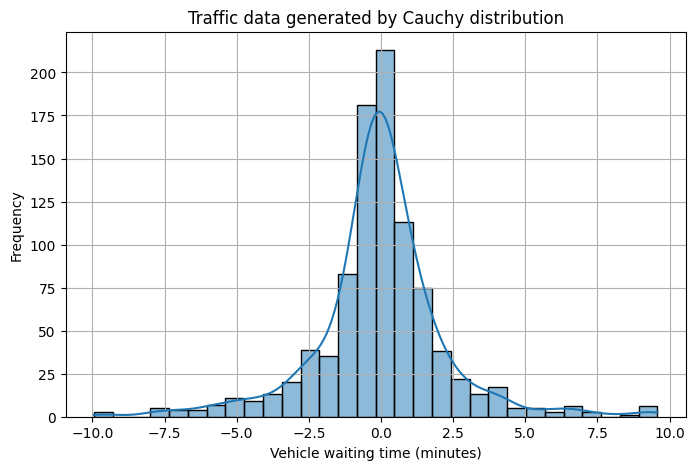

In [2]:
plt.figure(figsize=(8, 5))
sns.histplot(cauchy_samples, bins=30, kde=True, edgecolor='black')  # 히스토그램 시각화 코드 작성
plt.title('Traffic data generated by Cauchy distribution')
plt.xlabel('Vehicle waiting time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

3. 정규분포 근사 확인- 표본 크기(n)가 증가할수록 정규분포에서는 평균이 수렴하지만, Cauchy 분포에서는 평균이 불안정함을 확인- 여러 크기의 표본을 추출하여 평균의 변화를 시각적으로 비교

In [4]:
sample_sizes = [10, 50, 100, 500, 1000]
sample_means = []
np.random.seed(42)

for size in sample_sizes:
    means = [np.mean(np.random.standard_cauchy(size=len(sample_sizes))) for _ in range(100)]  # 샘플 평균 계산 코드 작성
    sample_means.append(means)


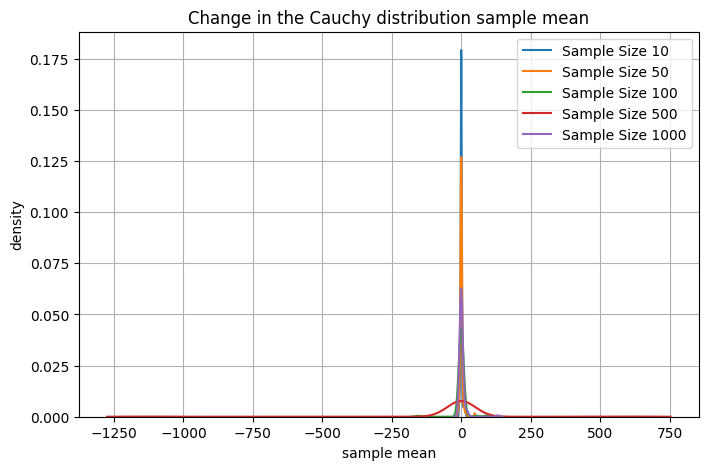

In [6]:
# 각 샘플 크기에 대한 평균값 시각화
plt.figure(figsize=(8, 5))
for i, size in enumerate(sample_sizes):
    sns.kdeplot(sample_means[i], label=f'Sample Size {size}')

plt.title('Change in the Cauchy distribution sample mean')
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend()
plt.grid(True)
plt.show()

'''
cauchy 분포는 정규분포로 근사되지 않는 대표적인 분포
그래프는 수렴하지 않는, 즉 중심극한정리가 적용되지 않는 예시로 매우 전형적인 모습
긴꼬리 분포(heavy-tailed distribution) 라고 해서 모두 코시분포처럼 중심극한정리가 무너지는 건 아닙니다.
→ 코시분포는 긴꼬리 중에서도 "특이하게 극단적인 분포"입니다.
긴꼬리 중에서도 평균·분산이 아예 정의되지 않는 유일한 분포 중 하나입니다.
'''